In [79]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import warnings
from rdkit import RDLogger
import pandas as pd

## Load the data
Files:  sdf, txt, csv

In [80]:
# sdf - DrugBank
warnings.filterwarnings('ignore')
RDLogger.DisableLog('rdApp.*')
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')  # Default working directory is where the notebook is
drugs = [m for m in suppl if not m == None]  # supplier sometimes returns None, you can see many errors below
# change to dataframe with columns 'SMILES' and 'DATABASE_ID
drugs = pd.DataFrame([Chem.MolToSmiles(m) for m in drugs], columns=['SMILES'])
# create new column with 1, 2, 3... ids
drugs['drugbank_id'] = range(1, len(drugs) + 1)
drugs.head()

,SMILES,drugbank_id
0,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,1
1,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,2
2,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,3
3,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,4
4,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,5


In [81]:
# txt - zinc
# from txt to pandas
zinc = pd.read_csv('../data/zinc_random_structures.txt', delimiter=' ')
zinc = zinc[['zincid', 'SMILES']]
zinc.head()

,zincid,SMILES
0,ZINCtA000001eUS8,CCOC(=O)c1cnc(SC)[nH]c1=N[C@@H]1CC[C@@H]2CN(C(...
1,ZINCpo00001BLwat,CC/C=C\[C@@H](CO)NC(=O)[C@H]1C[C@@H](F)CN1C(=O...
2,ZINCtz000004JjrO,CC(C)CO[C@H](C(=O)N[C@H]1CCN(C(=O)c2cc3c[nH]nc...
3,ZINCsN000009NpXg,O=C(N[C@]12CCC[C@@H]1N(C(=O)C1=C[C@H]3CCC[C@@H...
4,ZINCsN000009NsBY,O=C(N[C@]12CCC[C@H]1N(C(=O)c1cc(Cl)c[nH]1)CC2)...


In [82]:
# csv - chembl
chembl = pd.read_csv('../data/chembl_mtor_ic50.csv', delimiter=';')
chembl = chembl[['Molecule ChEMBL ID','Smiles']]
# rename columns 'Smiles' to 'SMILES'
chembl = chembl.rename(columns={'Molecule ChEMBL ID': 'ChEMBL ID', 'Smiles': 'SMILES'})
chembl.head()

,ChEMBL ID,SMILES
0,CHEMBL1773577,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...
1,CHEMBL1773561,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1
2,CHEMBL1773077,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1
3,CHEMBL1773580,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...
4,CHEMBL1773578,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...


In [83]:
structures = pd.concat([drugs, chembl, zinc])
structures.head()

,SMILES,drugbank_id,ChEMBL ID,zincid
0,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,1.0,NaN,NaN
1,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,2.0,NaN,NaN
2,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,3.0,NaN,NaN
3,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,4.0,NaN,NaN
4,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,5.0,NaN,NaN


In [84]:
# create new column with lambda Chem.MolFromSmiles
structures['Molecule'] = structures['SMILES'].apply(lambda x: Chem.MolFromSmiles(x))
structures.head()

,SMILES,drugbank_id,ChEMBL ID,zincid,Molecule
0,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,1.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C322...
1,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,2.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C322...
2,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,3.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C25A...
3,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,4.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C25A...
4,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,5.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C25A...


## Standardization
We will use standardizer.py from chembl structure pipeline.

In [85]:
# standardize with standadizer.py (taken from chembl structure pipeline)
import standadizer
structures['Molecule'] = structures['Molecule'].apply(lambda x: standadizer.standardize_mol(x))
structures.head()

,SMILES,drugbank_id,ChEMBL ID,zincid,Molecule
0,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,1.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C638...
1,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,2.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C63F...
2,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,3.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C63F...
3,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,4.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C684...
4,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,5.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C684...


In [86]:
# filter with Lipinski's rule of five
from rdkit.Chem import Descriptors
def lipinski(mol):
    if mol is None:
        return False
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    if mw < 500 and logp < 5 and hbd < 5 and hba < 10:
        return True
    else:
        return False
structures['Lipinski'] = structures['Molecule'].apply(lipinski)
structures.head(100)

,SMILES,drugbank_id,ChEMBL ID,zincid,Molecule,Lipinski
0,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,1.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C638...,False
1,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,2.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C63F...,False
2,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,3.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C63F...,False
3,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,4.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C684...,False
4,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,5.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C684...,False
...,...,...,...,...,...,...
95,CN(CCOc1ccc(NS(C)(=O)=O)cc1)CCc1ccc(NS(C)(=O)=...,96.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C684...,True
96,CCc1nc(N)nc(N)c1-c1ccc(Cl)cc1,97.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C684...,True
97,COC(=O)[C@H]1[C@H]2C[C@@H]3c4[nH]c5cc(OC)ccc5c...,98.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C684...,False
98,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,99.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C684...,False


We can see that 7th row could be drug-like. Let's show the molecule.

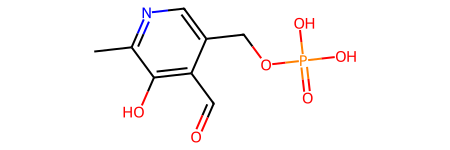

In [87]:
# show molecule with rdkit from smiles
smiles = "Cc1ncc(COP(=O)(O)O)c(C=O)c1O"
mol = Chem.MolFromSmiles(smiles)
mol

How many rows do we actually have before and after filtering?

In [88]:
# before filtering
print(f"Number of structures before filtering: {len(structures)}")
# after filtering
filtered_structures = structures[structures['Lipinski'] == True]
print(f"Number of structures after filtering: {len(filtered_structures)}")
# how many % from original dataset?
print(f"Percentage of structures that are drug-like: {len(filtered_structures) / len(structures) * 100:.2f}%")

# how many mols from drugbank (drugs) are drug-like?
drugbank_structures = structures[structures['drugbank_id'].notnull()]
filtered_drugbank_structures = drugbank_structures[drugbank_structures['Lipinski'] == True]
print(f"\nNumber of drug-like structures from DrugBank: {len(filtered_drugbank_structures)}")
print(f"Percentage of drug-like structures from DrugBank: {len(filtered_drugbank_structures) / len(drugbank_structures) * 100:.2f}%")

Number of structures before filtering: 18896
Number of structures after filtering: 15240
Percentage of structures that are drug-like: 80.65%

Number of drug-like structures from DrugBank: 5267
Percentage of drug-like structures from DrugBank: 73.97%


Quite interesting that not all drugs from drugbank are drug-like.
It's possible we have mistake somewhere...

Whatever...


## Descriptors
Lipinskiho rule of 5:
- Molecular weight < 500
- LogP < 5      ...LogP = octanol-water partition coefficient
- HBD < 5       ...HBD = number of hydrogen bond donors
- HBA < 10      ...HBA = number of hydrogen bond acceptors

In [89]:
# add columns with Lipinski's descriptors
structures['MolecularWeight'] = structures['Molecule'].apply(lambda x: Descriptors.MolWt(x) if x is not None else None)
structures['LogP'] = structures['Molecule'].apply(lambda x: Descriptors.MolLogP(x) if x is not None else None)
structures['HBD'] = structures['Molecule'].apply(lambda x: Descriptors.NumHDonors(x) if x is not None else None)
structures['HBA'] = structures['Molecule'].apply(lambda x: Descriptors.NumHAcceptors(x) if x is not None else None)
structures.head()

,SMILES,drugbank_id,ChEMBL ID,zincid,Molecule,Lipinski,MolecularWeight,LogP,HBD,HBA
0,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,1.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C638...,False,2180.317,-8.11643,28,29
1,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,2.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C63F...,False,1269.433,-3.10570,17,16
2,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,3.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C63F...,False,1069.238,-4.13203,14,15
3,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,4.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C684...,False,1431.064,-0.50613,17,16
4,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,5.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C684...,False,1202.635,3.26900,5,12


Let's do some graphical analysis of our data.


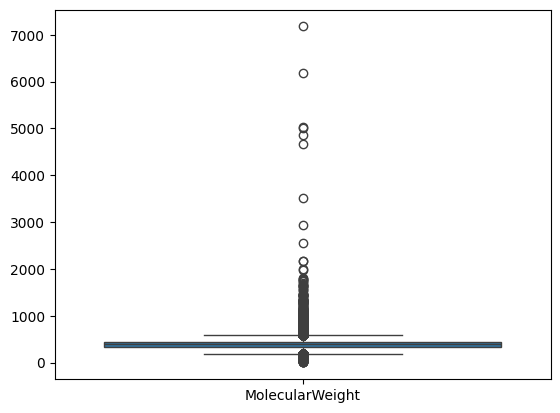

In [90]:
# seaborn boxplots
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=structures[['MolecularWeight']])
plt.show()

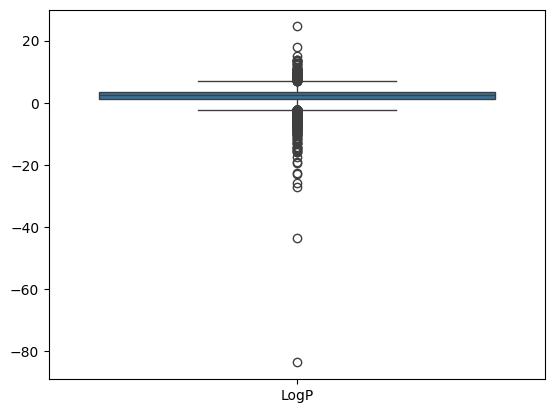

In [91]:
sns.boxplot(data=structures[['LogP']])
plt.show()

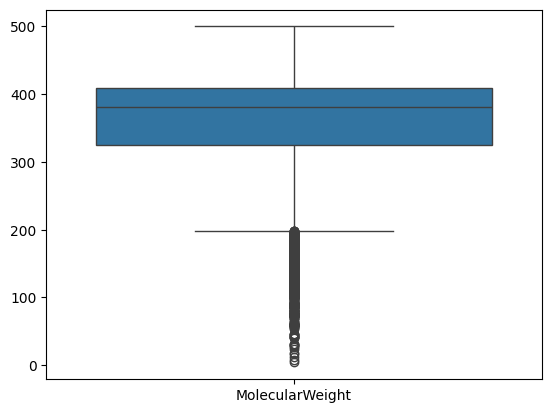

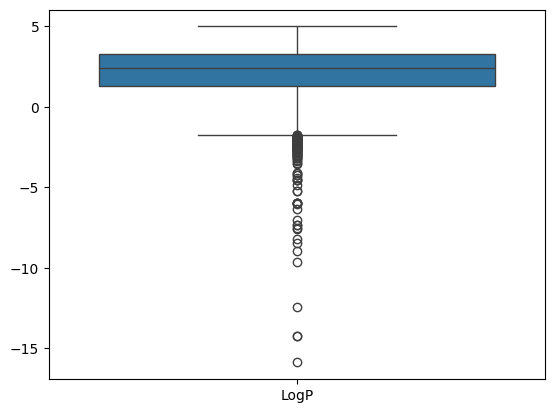

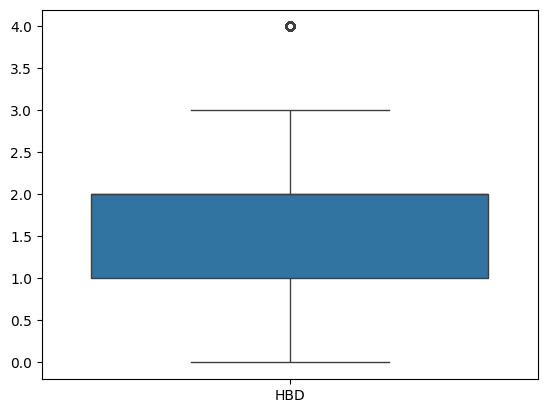

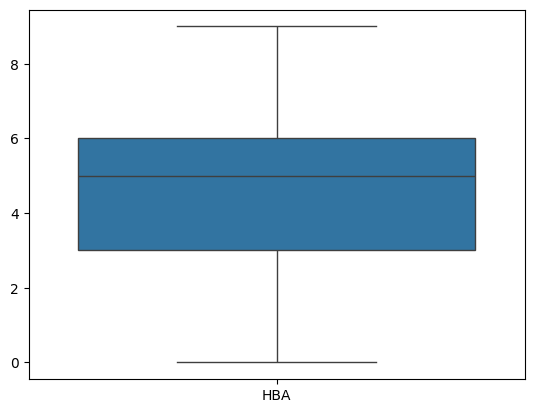

In [92]:
# filter only those with Lipinski's rule of five
filtered_structures = structures[structures['Lipinski'] == True]
# seaborn boxplots for filtered structures
sns.boxplot(data=filtered_structures[['MolecularWeight']])
plt.show()
sns.boxplot(data=filtered_structures[['LogP']])
plt.show()
sns.boxplot(data=filtered_structures[['HBD']])
plt.show()
sns.boxplot(data=filtered_structures[['HBA']])
plt.show()

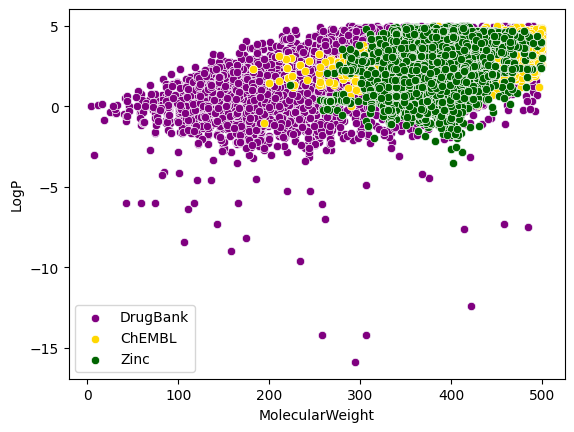

In [93]:
# Scatter plot of MolecularWeight vs LogP
sns.scatterplot(data=filtered_structures, x='MolecularWeight', y='LogP')
# different color for drugbank, zinc and chembl
sns.scatterplot(data=filtered_structures[filtered_structures['drugbank_id'].notnull()], x='MolecularWeight', y='LogP', color='purple', label='DrugBank')
sns.scatterplot(data=filtered_structures[filtered_structures['ChEMBL ID'].notnull()], x='MolecularWeight', y='LogP', color='gold', label='ChEMBL')
sns.scatterplot(data=filtered_structures[filtered_structures['zincid'].notnull()], x='MolecularWeight', y='LogP', color='darkgreen', label='Zinc')
plt.legend()
plt.show()

We should probably remove duplicates.

In [95]:
# remove duplicates based on rdkit objects to new dataframe with only unique molecules
print(f"Number of structures before removing duplicates: {len(structures)}")
non_duplicates = structures.drop_duplicates(subset=['Molecule'])

# # print how many structures we have after removing duplicates
print(f"Number of structures after removing duplicates: {len(non_duplicates)}")

Number of structures before removing duplicates: 18896
Number of structures after removing duplicates: 18896


Now: molToSmiles

In [96]:
# create new column with canonical smiles
structures['Canonical_SMILES'] = structures['Molecule'].apply(lambda x: Chem.MolToSmiles(x) if x is not None else None)
structures.head()

,SMILES,drugbank_id,ChEMBL ID,zincid,Molecule,Lipinski,MolecularWeight,LogP,HBD,HBA,Canonical_SMILES
0,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,1.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C638...,False,2180.317,-8.11643,28,29,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...
1,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,2.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C63F...,False,1269.433,-3.10570,17,16,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...
2,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,3.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C63F...,False,1069.238,-4.13203,14,15,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...
3,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,4.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C684...,False,1431.064,-0.50613,17,16,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...
4,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,5.0,NaN,NaN,<rdkit.Chem.rdchem.Mol object at 0x0000020C684...,False,1202.635,3.26900,5,12,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...


In [100]:
#save canonical smiles to csv
reduced = structures[['Canonical_SMILES', 'drugbank_id', 'ChEMBL ID', 'zincid']]
reduced.to_csv('../my_data/structures_smiles.csv', index=False)